# Machine Learning using Sklearn with a Focus on practical implementation
Designed for an introductory workshop introducing the scikit-learn package and how to get start using the models for research work (especially with an emphasis on the social sciences). Implementation mostly focuses on regression problems and Random Forests.

In [2]:
# Load dataset if necessary 
#!wget https://raw.githubusercontent.com/M-Harrington/Instruction/master/corruption_dataset.csv

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

### Data Preprocessing

In [41]:
df.to_csv("corruption_dataset.csv")

In [43]:
# Read data, take look
df = pd.read_csv('corruption_dataset.csv',index_col=0)
df.head()

,CPI_2015,Risk_Dec_15,Risk_Nov_14,year,electric_percap,food_prod_index,percent_forest,gdp,income_bottom_20,literacy_male,...,childmort,net_migration,pop,undernourish,school_complete,researchers,rural_pop,total_debt,urban_pop,row_na
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,89,NaN,NaN,2012,NaN,122.13,2.067825,2.000162e+10,NaN,NaN,...,82.6,448007.0,31161376.0,23.4,NaN,NaN,75.840,0.601426,7528588.0,8
Albania,64,67.8,66.3,2012,2118.327776,133.04,28.262044,1.231978e+10,8.9,98.352608,...,10.7,-93425.0,2900401.0,6.0,98.911697,NaN,45.670,14.215342,1575788.0,1
Algeria,64,64.3,68.3,2012,1237.966507,149.67,0.811675,2.090590e+11,NaN,NaN,...,26.1,-143268.0,37383887.0,5.0,101.450180,NaN,31.085,1.093393,25763106.0,4
Angola,85,59.0,65.8,2012,219.253430,152.82,46.707627,1.280529e+11,NaN,NaN,...,105.8,87322.0,25107931.0,35.1,NaN,NaN,38.732,5.856513,15383127.0,5
Argentina,68,66.5,63.8,2012,3000.603523,108.03,10.232215,5.459824e+11,4.9,99.111130,...,13.3,30000.0,41733271.0,3.7,103.231369,1199.36089,8.879,NaN,38027774.0,1


In [44]:
#Check shape
print(df.shape, "\n")

#Check data quality, Make sure that no NA's in y target
print(list(df.columns), "\n")
for col in list(df.columns):
    print("Number of NAs in ",col, "is " , df[col].isna().sum())

(162, 21) 

['CPI_2015', 'Risk_Dec_15', 'Risk_Nov_14', 'year', 'electric_percap', 'food_prod_index', 'percent_forest', 'gdp', 'income_bottom_20', 'literacy_male', 'literacy_female', 'childmort', 'net_migration', 'pop', 'undernourish', 'school_complete', 'researchers', 'rural_pop', 'total_debt', 'urban_pop', 'row_na'] 

Number of NAs in  CPI_2015 is  0
Number of NAs in  Risk_Dec_15 is  28
Number of NAs in  Risk_Nov_14 is  28
Number of NAs in  year is  0
Number of NAs in  electric_percap is  28
Number of NAs in  food_prod_index is  2
Number of NAs in  percent_forest is  2
Number of NAs in  gdp is  4
Number of NAs in  income_bottom_20 is  86
Number of NAs in  literacy_male is  121
Number of NAs in  literacy_female is  122
Number of NAs in  childmort is  0
Number of NAs in  net_migration is  0
Number of NAs in  pop is  1
Number of NAs in  undernourish is  15
Number of NAs in  school_complete is  47
Number of NAs in  researchers is  94
Number of NAs in  rural_pop is  1
Number of NAs in  tot

In [45]:
# make NAs machine-friendly
df = df.fillna(-9999)

df.head() #Good to go

,CPI_2015,Risk_Dec_15,Risk_Nov_14,year,electric_percap,food_prod_index,percent_forest,gdp,income_bottom_20,literacy_male,...,childmort,net_migration,pop,undernourish,school_complete,researchers,rural_pop,total_debt,urban_pop,row_na
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,89,-9999.0,-9999.0,2012,-9999.000000,122.13,2.067825,2.000162e+10,-9999.0,-9999.000000,...,82.6,448007.0,31161376.0,23.4,-9999.000000,-9999.00000,75.840,0.601426,7528588.0,8
Albania,64,67.8,66.3,2012,2118.327776,133.04,28.262044,1.231978e+10,8.9,98.352608,...,10.7,-93425.0,2900401.0,6.0,98.911697,-9999.00000,45.670,14.215342,1575788.0,1
Algeria,64,64.3,68.3,2012,1237.966507,149.67,0.811675,2.090590e+11,-9999.0,-9999.000000,...,26.1,-143268.0,37383887.0,5.0,101.450180,-9999.00000,31.085,1.093393,25763106.0,4
Angola,85,59.0,65.8,2012,219.253430,152.82,46.707627,1.280529e+11,-9999.0,-9999.000000,...,105.8,87322.0,25107931.0,35.1,-9999.000000,-9999.00000,38.732,5.856513,15383127.0,5
Argentina,68,66.5,63.8,2012,3000.603523,108.03,10.232215,5.459824e+11,4.9,99.111130,...,13.3,30000.0,41733271.0,3.7,103.231369,1199.36089,8.879,-9999.000000,38027774.0,1


In [46]:
# Save in format for machine
X = df.iloc[:,1:df.shape[1]]
y = df['CPI_2015']

## Training, predicting, Visualization
First we run a decision tree with large min leaf size, then one with a smaller sample size to show the effect. Note how easy sklearn makes it to get started! Can even do it in three lines!

In [47]:
#Set Seed (global)
np.random.seed(123532)

#run model
rfr1 = RandomForestRegressor(n_estimators=1, min_samples_leaf=7)
print(rfr1) #note defaults

#reshape 1d X to 2d array and fit
X_small= X['childmort'].values.reshape(-1, 1) 
rfr1.fit(X_small, y)

"Congrats on doing machine learning!"

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=7, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=None,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)


'Congrats on doing machine learning!'

In [48]:
rfr2 = RandomForestRegressor(n_estimators=1, min_samples_leaf=1)
rfr2.fit(X_small, y)
rfr2

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=None,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [49]:
# Make Predictions:
X_pred = np.arange(0.0, 140.0, 0.1)[:, np.newaxis] #reshaping again
y_pred = rfr1.predict(X_pred)
y_pred2= rfr2.predict(X_pred)

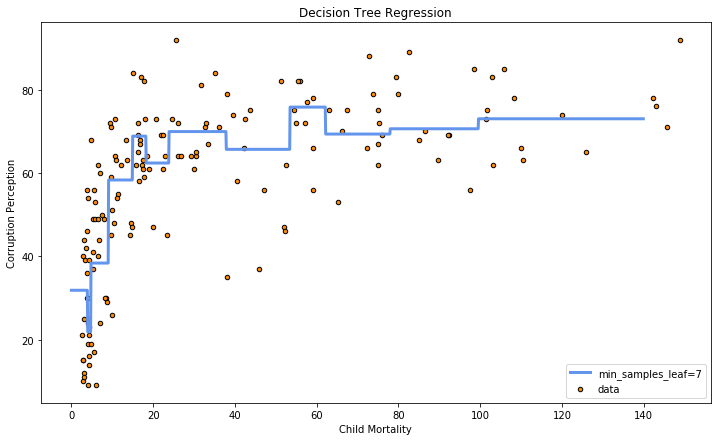

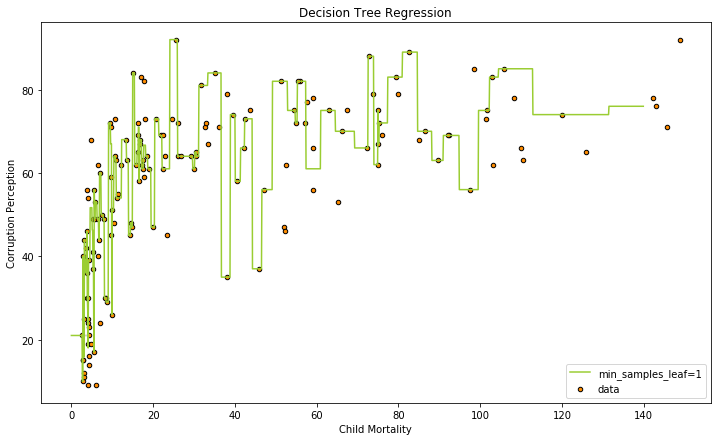

In [50]:
# Visualize the tree (No Overfitting)
# Plot the results
plt.figure(figsize=(12,7))
plt.scatter(X_small, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_pred, y_pred, color="cornflowerblue",
         label="min_samples_leaf=7", linewidth=3)
plt.xlabel("Child Mortality")
plt.ylabel("Corruption Perception")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# Visualize the tree
# Plot the results
plt.figure(figsize=(12,7))
plt.scatter(X_small, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_pred, y_pred2, color="yellowgreen", label="min_samples_leaf=1")
plt.xlabel("Child Mortality")
plt.ylabel("Corruption Perception")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()


### Demonstrate RandomForest output

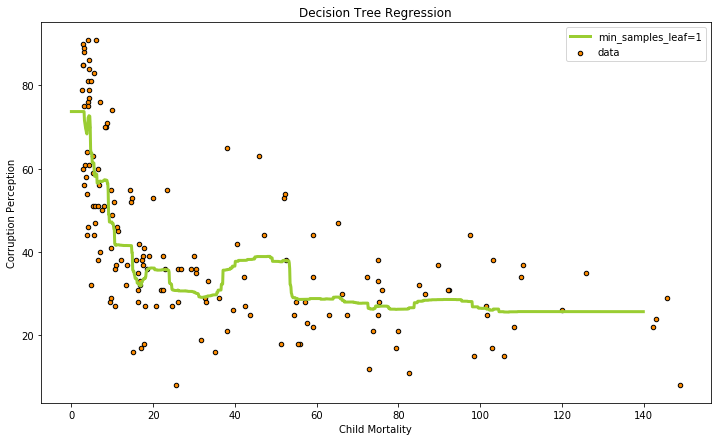

In [12]:
#Now Build a random forest with 1000 trees and a min_samples_leaf=7
rfr3 = RandomForestRegressor(n_estimators=1000, min_samples_leaf=7,random_state=346234) #random state another way to not set seed
rfr3.fit(X_small, y)
y_pred3 = rfr3.predict(X_pred)

# Plot
plt.figure(figsize=(12,7))
plt.scatter(X_small, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_pred, y_pred3, color="yellowgreen", label="min_samples_leaf=1",linewidth=3)
plt.xlabel("Child Mortality")
plt.ylabel("Corruption Perception")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()


## Cross Validation

In [13]:
# Split up into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X_small,y, test_size=0.25) #testing on 25% of the data

print(X_train.shape)
print(X_test.shape)

(121, 1)
(41, 1)


In [14]:
rfr4 = RandomForestRegressor(n_estimators=100, min_samples_leaf=1)
rfr4.fit(X_train, y_train)

#Evaluate on training set to get MSE
y_model = rfr4.predict(X_train)
sq_dist = (y_model-y_train)**2  #Vectorized math through numpy
mse_train = sq_dist.sum()/X_train.shape[0]
print("Training MSE is: ", mse_train)

#Evaluate on testing set to get MSE
y_model = rfr4.predict(X_test)
sq_dist = (y_model-y_test)**2  #Vectorized math through numpy
mse_test = sq_dist.sum()/X_test.shape[0]
print("Testing MSE is: ", mse_test)  #Hence overfitting problem 

Training MSE is:  43.05465605112739
Testing MSE is:  230.54699365804234


Note you can use the `KFold` function in `sklearn.model_selection` to do cross validation without the CV Search used below. Likewise remember that CV uses the whole dataset as both testing and trainig datas rotating through all possible splits.

## Hyperparam Search

In [15]:
#long way 
min_samp= [3,6,10]
n_estimators = [2,6,14]

param_grid = [(i,j) for i in min_samp for j in n_estimators] #etc etc etc

In [20]:
# Easy way using gridsearch
param_grid = {'min_samples_leaf':[1,5,10,15,20], 'n_estimators':[1,5,35,75,100,200]}

rfr = RandomForestRegressor() #parameters to keep constant
rfr_gscv = GridSearchCV(rfr, param_grid, cv=5, scoring ='neg_mean_squared_error',iid=False)
rfr_gscv.fit(X_small, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid=False, n_jobs=None,
             param_grid={'min_samples_leaf': [1, 5, 10, 1

In [22]:
# See our results!
# rfr_gscv.best_score_
rfr_gscv.best_params_

{'min_samples_leaf': 10, 'n_estimators': 35}

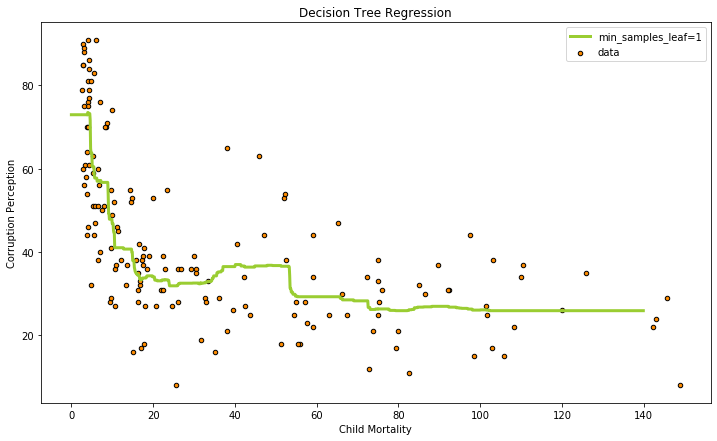

In [24]:
#Visualize the best
rfr5 = RandomForestRegressor(min_samples_leaf=10, n_estimators=35)
rfr5.fit(X_small, y)
y_pred5 = rfr5.predict(X_pred)

# Plot
plt.figure(figsize=(12,7))
plt.scatter(X_small, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_pred, y_pred5, color="yellowgreen", label="min_samples_leaf=1",linewidth=3)
plt.xlabel("Child Mortality")
plt.ylabel("Corruption Perception")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()


Note: there are dangers of the above when using too fine-grained of a search (begin to "*fit the testing set*")

Make a note of the fact that after you've done the cross validation to pick the best paramater, when you go back to get your predictions, you should use the full model. I.e. train a model with the *same* parameters that you found in the original, then train with those parameters on the full dataset.  **This will be a different model than training with the same parameters on the smaller dataset**.

### Permutation Importance using ELI5
Permutation importance is shortly coming to Sklearn, but for now we have to use an older package.

In [26]:
!pip install eli5

  Using cached https://files.pythonhosted.org/packages/97/2f/c85c7d8f8548e460829971785347e14e45fa5c6617da374711dec8cb38cc/eli5-0.10.1-py2.py3-none-any.whl


In [28]:
import eli5
from eli5.sklearn import PermutationImportance

In [30]:
# Run permutation importance
perm = PermutationImportance(rfr5, cv=5)
perm.fit(X_small, y)

PermutationImportance(cv=5,
                      estimator=RandomForestRegressor(bootstrap=True,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features='auto',
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=10,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      n_estimators=35,
                                                      n_jobs=None,
                                                      oob_score=False,
        

In [33]:
# Extract results (not interesting because only one variable)
eli5.show_weights(perm)
eli5.explain_weights_df(perm)

,feature,weight,std
0,x0,1.36922,0.408843


## Exercise:
Using what you've learned today, create your own model to predict corruption from the covariates. Pick variables you think are relevant (and that might cause corruption perception to be higher or lower). Do cross validation on your model to pick the best hyperparameters and then use the permutation importance to determine the relative importance of each variable.

**Bonus Q:** Make up some realitistic values for the variables for a fake country. See what the model predicts for this country.  Does your model predict that corruption will be high or low in this fake country?